# Linear Regression

In this tutorial we will implement a linear regression model. We will also implement a function that splits the available data into a training and a testting part.

## Problem Setting

We will use the Boston Housing Dataset. This dataset contains information collected by the U.S Census Service concerning housing in the city of Boston in the state of Massachusetts in 1978. Our goal is to predict the median value of the houses in a particular town in the city of Boston given its attributes. Check the file ’housing.names’ for more information on the attributes.

In [1]:
%matplotlib inline
#import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
#testfile = urllib.URLopener()
#testfile.retrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names", "housing.names")
df = pd.DataFrame(boston.data)
df.columns = ['crime_rate','res_land_zoned','industry','charles_river','nox','avg_num_rooms','prop_bf_1940','dst_emply_center','rd_highway_idx','tax_rate','stdnt_tchr_ratio','prop_blacks','low_status_pct']
X = boston.data
y = boston.target

In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
df.head(10)

,crime_rate,res_land_zoned,industry,charles_river,nox,avg_num_rooms,prop_bf_1940,dst_emply_center,rd_highway_idx,tax_rate,stdnt_tchr_ratio,prop_blacks,low_status_pct
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
df.shape

(506, 13)

## Least Squares 

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
least_squares = LinearRegression(normalize=True, )

In [9]:
least_squares.fit(X, y)

/Users/uberwach/anaconda2/envs/python35/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [10]:
!pip install seaborn

    100% |████████████████████████████████| 184kB 2.2MB/s ta 0:00:01
  Running setup.py bdist_wheel for seaborn ... done
  Stored in directory: /Users/uberwach/Library/Caches/pip/wheels/29/af/4b/ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


Text(0.5,1,'Weights of least squares')

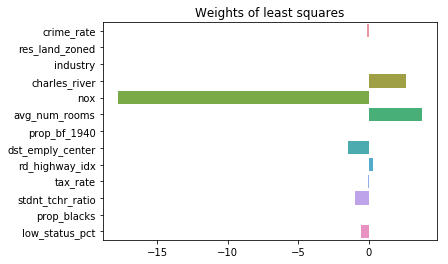

In [11]:
import seaborn as sns

sns.barplot(x=least_squares.coef_, y=df.columns, orient="h")
plt.title("Weights of least squares")

But how good is our model on the data?

In [12]:
least_squares.score(X, y) # R^2

0.74060774286494269

In [13]:
LinearRegression??

The `score` method always returns the metric the model has been optimized for. The `sklearn.metrics` package contains all kinds of metrics.

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
y_pred = least_squares.predict(X) # computes the predictions
mean_squared_error(y, y_pred)

21.8977792176875

## An unpleasant surprise

But in reality our model has to form predictions on *unseen* data. Let's model this situation.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
print(X_train.shape, X_test.shape, X.shape)

(379, 13) (127, 13) (506, 13)


In [48]:
least_squares.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [49]:
print("Train score: %.4f" % least_squares.score(X_train, y_train))
print("Test score: %.4f" % least_squares.score(X_test, y_test))

Train score: 0.7481
Test score: 0.6840


The test score is way worse! This is the effect of overfitting.

*Exercise*: Compute the MSE for the train and test set. How does it compare to the situation before?

In [21]:
# %load ./solutions/mse.py
y_pred_train = least_squares.predict(X_train)
y_pred_test = least_squares.predict(X_test)

print("Train MSE: %.4f" % mean_squared_error(y_pred_train, y_train))
print("Test MSE: %.4f" % mean_squared_error(y_pred_test, y_test))

Train MSE: 22.3385
Test MSE: 22.1317


## Other models...

Try other models, play with the parameters and try to beat the best score!

*Extra*: Inspect the features not used by the Lasso model and remove them from the feature set. Does this improve the performance of all (others included!) models?

In [50]:
from sklearn.linear_model import Ridge # L_2
from sklearn.linear_model import Lasso # L_1
from sklearn.linear_model import ElasticNet # convex(L_1, L_2)

In [81]:
lasso = Lasso(alpha=5e-2, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [82]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.31541428, -0.        ,
        4.18252691, -0.        , -0.        , -0.        , -0.        ,
       -0.55187472,  0.00475577, -0.49931538])

In [83]:
print("Train score: %.4f" % lasso.score(X_train, y_train))
print("Test score: %.4f" % lasso.score(X_test, y_test))

Train score: 0.6803
Test score: 0.6296


In [85]:
used_features = lasso.coef_ != 0.0
print(used_features)

[False False False  True False  True False False False False  True  True
  True]


In [86]:
X_reduced = X[:, used_features]

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, random_state=42)

$\lambda$ must be lowered because there is less noise to learn from.

In [95]:
lasso = Lasso(alpha=0.01, normalize=True)
lasso.fit(X_train_red, y_train_red)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
print("Train score: %.4f" % lasso.score(X_train_red, y_train_red))
print("Test score: %.4f" % lasso.score(X_test_red, y_test_red))

Train score: 0.7096
Test score: 0.6319


## Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [100]:
clf_pipe = make_pipeline(
    PolynomialFeatures(degree=5),
    ElasticNet(alpha=0.001, 
               l1_ratio=0.3, 
               normalize=True, 
               random_state=42, 
               max_iter=1000)
)

clf_pipe.fit(X_train, y_train)

/Users/uberwach/anaconda2/envs/python35/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
      max_iter=10000, normalize=True, positive=False, precompute=False,
      random_state=42, selection='cyclic', tol=0.0001, warm_start=False))])

In [103]:
poly_feats = PolynomialFeatures(degree=5)
X_poly = poly_feats.fit_transform(X)

In [107]:
X.shape

(506, 13)

In [104]:
X_poly.shape

(506, 8568)

In [108]:
print("Train score: %.4f" % clf_pipe.score(X_train, y_train))
print("Test score: %.4f" % clf_pipe.score(X_test, y_test))

Train score: 0.9426
Test score: 0.8457


In [109]:
from sklearn.metrics import r2_score

In [110]:
r2_score(y_test, clf_pipe.predict(X_test))

0.84569448916692336

In [111]:
clf_pipe.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)),
 ('elasticnet',
  ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.3,
        max_iter=10000, normalize=True, positive=False, precompute=False,
        random_state=42, selection='cyclic', tol=0.0001, warm_start=False))]

In [112]:
clf_pipe.steps[1][1].coef_.shape

(8568,)

In [139]:
from sklearn.model_selection import GridSearchCV

params = {
    "polynomialfeatures__degree": [1, 2, 3, 4, 5],
    "elasticnet__alpha": [10**i for i in range(-2, 0)],
    "elasticnet__l1_ratio": np.linspace(0.1, 0.9, 3)
}

clf_pipe = make_pipeline(
    PolynomialFeatures(),
    ElasticNet(normalize=True, random_state=42)
)

grid = GridSearchCV(clf_pipe, params, scoring="r2", verbose=True, cv=3)
grid.fit(X_train, y_train)

grid.cv_results_

grid.best_estimator_